In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import pickle
import seaborn as sns 
import scipy

1. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

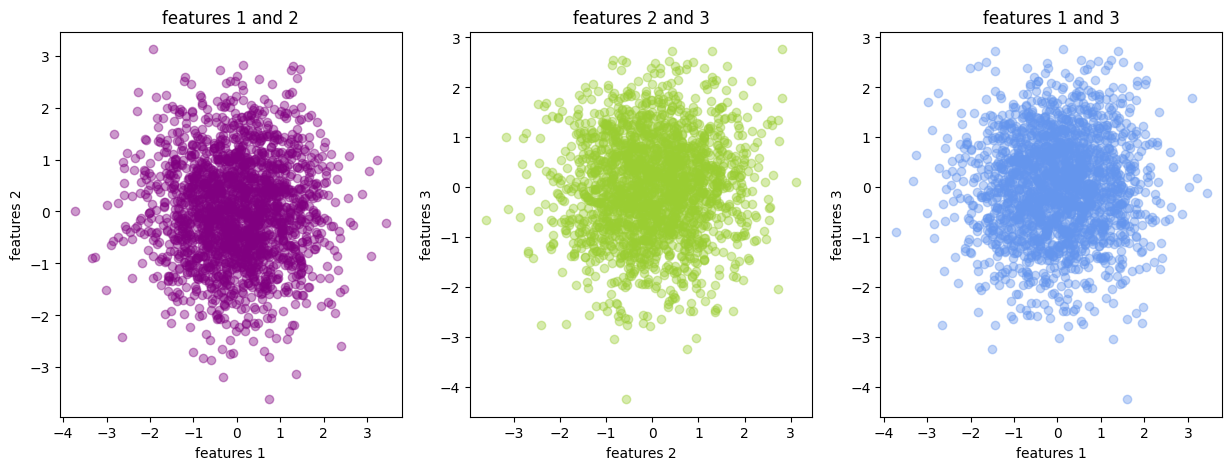

They are no correlated


In [6]:
df = pd.read_csv('ScientificComputingWithPython2023/data/regression_generated.csv')

f_1 = df['features_1']
f_2 = df['features_2']
f_3 = df['features_3']

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].set_title('features 1 and 2')
axs[1].set_title('features 2 and 3')
axs[2].set_title('features 1 and 3')

axs[0].set_xlabel('features 1')
axs[1].set_xlabel('features 2')
axs[2].set_xlabel('features 1')

axs[0].set_ylabel('features 2')
axs[1].set_ylabel('features 3')
axs[2].set_ylabel('features 3')

axs[0].scatter(f_1, f_2, alpha=0.4, facecolor ='purple')
axs[1].scatter(f_2, f_3, alpha=0.4, facecolor ='yellowgreen')
axs[2].scatter(f_1, f_3, alpha=0.4, facecolor ='cornflowerblue')

plt.show()

print('They are no correlated')

2. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

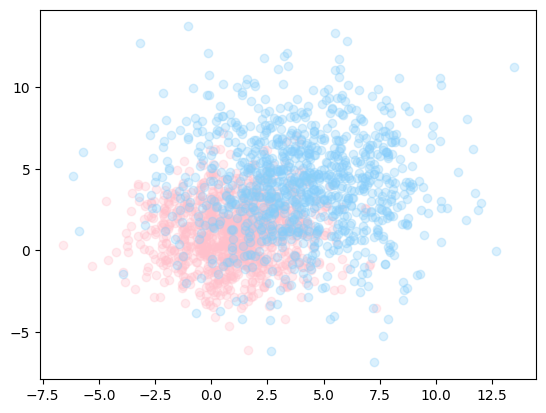

In [7]:
def generator(m, c, N):
    x = np.random.normal(m, c, N)
    y = np.random.normal(m, c, N)
    return x,y

data_1 = generator(1,2,1000)
data_2 = generator(4,3,1000)

plt.scatter(data_1[0], data_1[1], alpha=0.3, color="pink")
plt.scatter(data_2[0], data_2[1], alpha=0.3, color="lightskyblue")
plt.show()

3. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

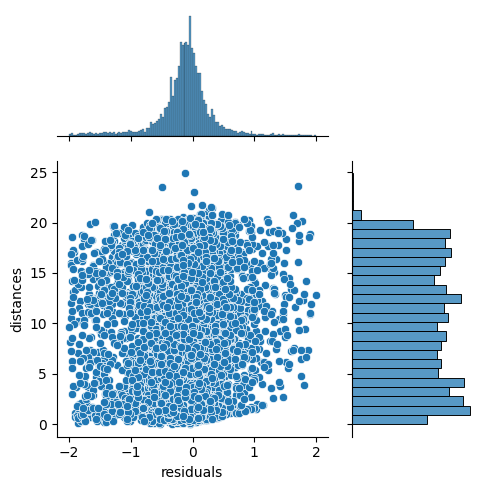

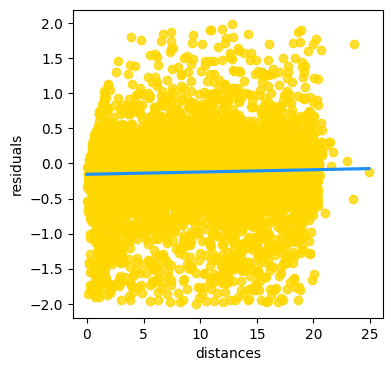

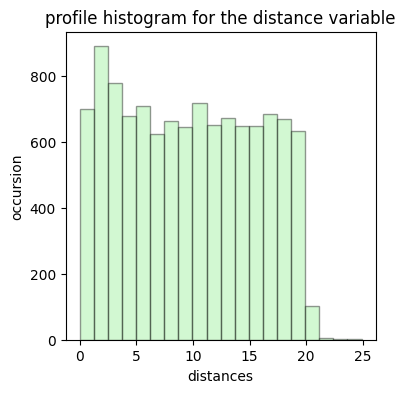

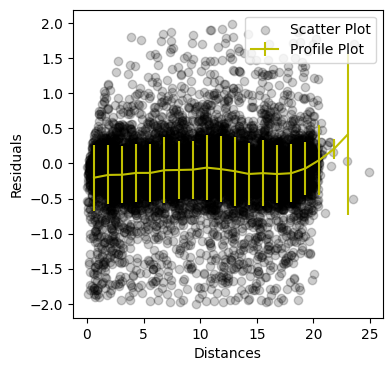

In [8]:
d = pd.read_pickle('ScientificComputingWithPython2023/data/residuals_261.pkl')
df = pd.DataFrame(d.tolist())

# cleaned sample
mask = abs(df['residuals'])<2
df_cleaned = df[mask]

# plot of "residuals" vs "distances"
sns.jointplot(x = "residuals", y = "distances", data = df_cleaned, height=5, ratio=2) 
plt.show()

# plot linear regression
plt.figure("Figure1", figsize=(4, 4))
sns.regplot(y="residuals", x="distances",data=df_cleaned, scatter_kws={"color": "gold"}, line_kws={"color": "dodgerblue"})

# profile histogram for the "distances" variable
plt.figure("Figure2", figsize=(4, 4))
(n, bins_edge, patches) = plt.hist(df['distances'], bins=20, alpha = 0.4, histtype='bar', ec='black', color = "lightgreen")
plt.title('profile histogram for the distance variable')
plt.xlabel("distances")
plt.ylabel("occursion")
plt.show()

# numpy array
x = (bins_edge[:-1] + bins_edge[1:]) / 2

y = []
err_y = []

for i in range(len(bins_edge) - 1):
    bin_data = df_cleaned[(df_cleaned['distances'] >= bins_edge[i]) & (df_cleaned['distances'] < bins_edge[i + 1])]
    y.append(bin_data['residuals'].mean())
    err_y.append(bin_data['residuals'].std())

# Plot 
plt.figure("Figure3", figsize=(4, 4))
plt.scatter(df_cleaned['distances'], df_cleaned['residuals'], alpha=0.2, label='Scatter Plot', color='black')

plt.errorbar(x, y, yerr=err_y, fmt='y-', label='Profile Plot')

plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.legend()

4. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.

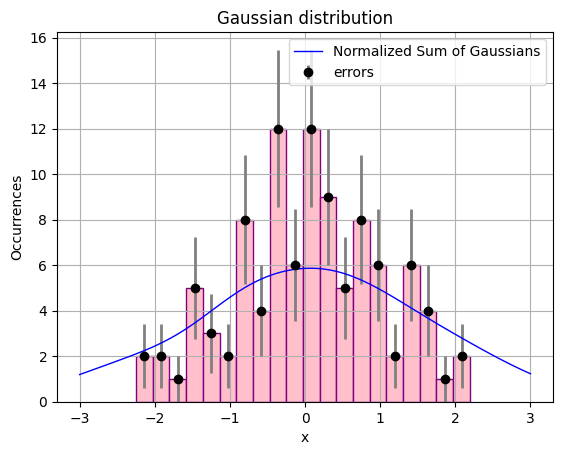

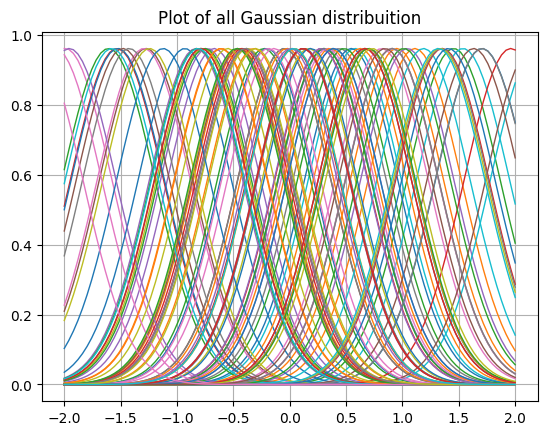

In [18]:
mu, sigma, N = 0, 1, 100
x = np.random.normal(mu, sigma, N)

#hist of x 
(n, bins_edge, patches) = plt.hist(x, bins= 20, histtype='bar', ec='purple', color = "pink" )
center = (bins_edge[:-1] + bins_edge[1:]) / 2

err = n**0.5

plt.title('Gaussian distribution')
plt.xlabel('x')
plt.ylabel('Occurrences')

plt.errorbar( x=center, y=n, yerr = err, fmt='o', color='black',ecolor='gray', elinewidth=2, capsize=0, label="errors")

#gaussian for every element of x
def gaussians(x_i, x, std):
    gauss = np.zeros((N,N))
    for i in range(len(x)):
        mean=x[i]
        distribution = scipy.stats.norm.pdf(x_i, mean, std)
        gauss[i,:] = distribution
    return gauss

x_i = np.linspace(-2, +2, 100)
std = 1.06*np.std(x)*(np.size(x))**(-1/5)

x_all = gaussians(x_i, x, std)

#sum and integral
x_val = np.linspace(-3, 3, 100)

x_sum = np.sum(x_all, axis = 0)

integral_sum = scipy.integrate.trapezoid(x_sum, x_val)

bin_width = bins_edge[1] - bins_edge[0]
integral_x = bin_width * sum(n)

normalized_sum_of_gaussians = x_sum * (integral_x / integral_sum)

# Plot the normalized sum of Gaussian functions
plt.plot(x_val, normalized_sum_of_gaussians, label='Normalized Sum of Gaussians', linestyle='-', linewidth=1, color='blue')
plt.legend()
plt.grid(True)
plt.show()

#plot all gaussians
for i in range(len(x)):
    plt.plot(x_i, scipy.stats.norm.pdf(x_i, x[i], std), linewidth=1)
    
plt.title('Plot of all Gaussian distribuition')
plt.grid(True)
plt.show()

